# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

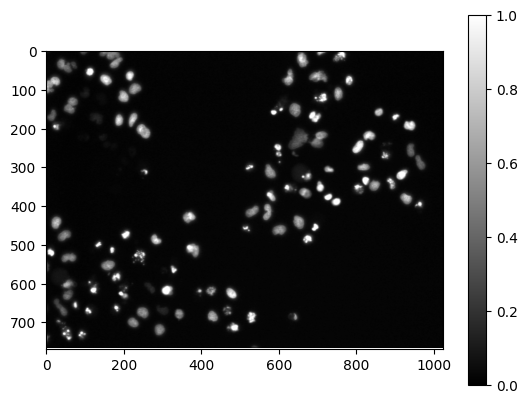

In [10]:
import numpy
import matplotlib.pyplot as plt

img = plt.imread('data/cells.png')
plt.figure()
plt.imshow(img, 'gray')
plt.colorbar()



---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

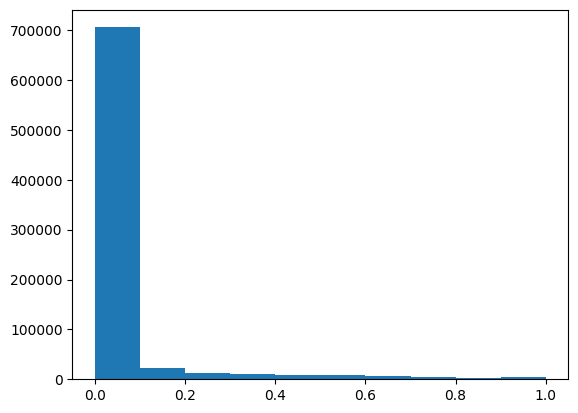

In [11]:
#plt.hist(img)
data = img.flatten()
plt.hist(data)

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [12]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

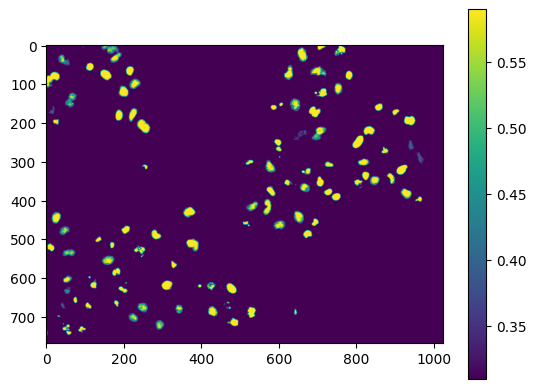

In [27]:

img1 = img.copy()
img2 = numpy.ndarray.clip(img1, min = T1, max = T2)
plt.imshow(img2)
plt.colorbar()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

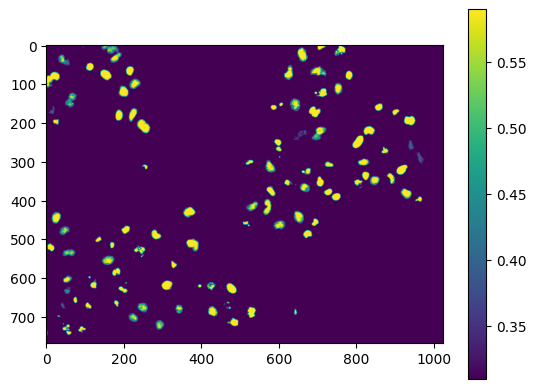

In [28]:
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if img2[i, j] < T1:
            img2[i, j] = T1
        elif img2[i, j] > T2:
            img2[i, j] = T2
plt.imshow(img2)
plt.colorbar()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:


(b) Use a single for-loop and if-conditions – Hint: numpy.ndindex(img.shape)
yields an iterable. The items of this iterable correspond to all pixel coordinates
of the image img. Each item is a pair of coordinates (i.e. row and column).
Use “[0]” and “[1]” to access the corresponding row and column of an item

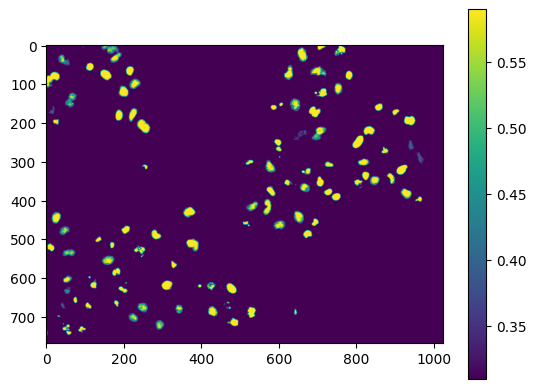

In [31]:
img3 = img.copy()
for i in numpy.ndindex(img.shape):
    if img3[i] > T2:
        img3[i] = T2
    elif img3[i] < T1: 
        img3[i] = T1
    else:
        img3[i] = img3[i]
plt.imshow(img3)
plt.colorbar()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

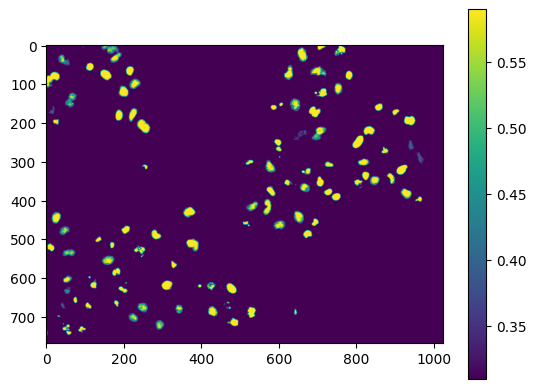

In [50]:
img4 = img.copy()
def clip_image(img4, T1, T2):
    imgclip = img.copy()
    for i in numpy.ndindex(img.shape):
        if imgclip[i] > T2:
            imgclip[i] = T2
        elif imgclip[i] < T1: 
            imgclip[i] = T1
        
    return imgclip
img5 = clip_image(img, T1, T2)
plt.imshow(img5)
plt.colorbar()

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [51]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

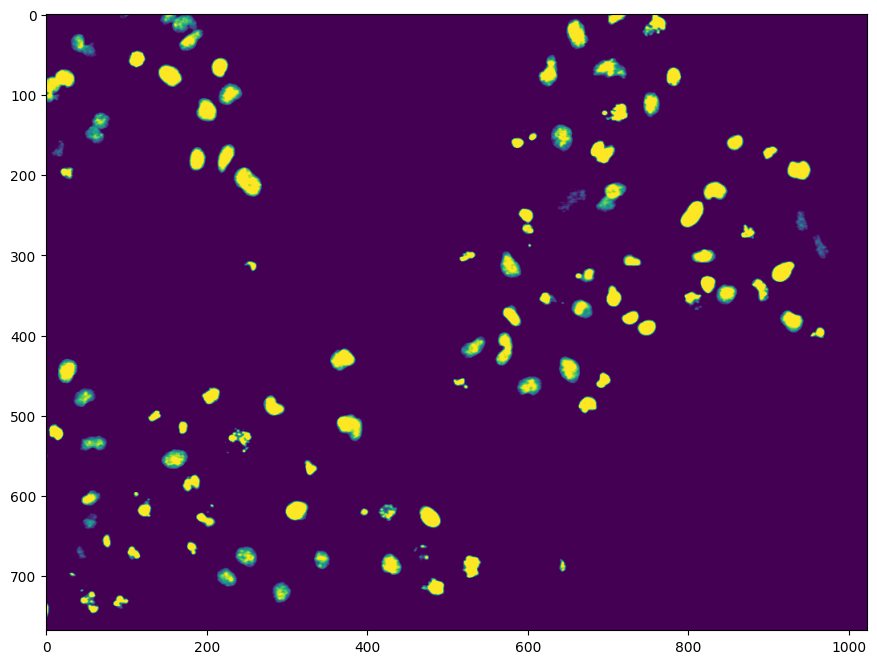

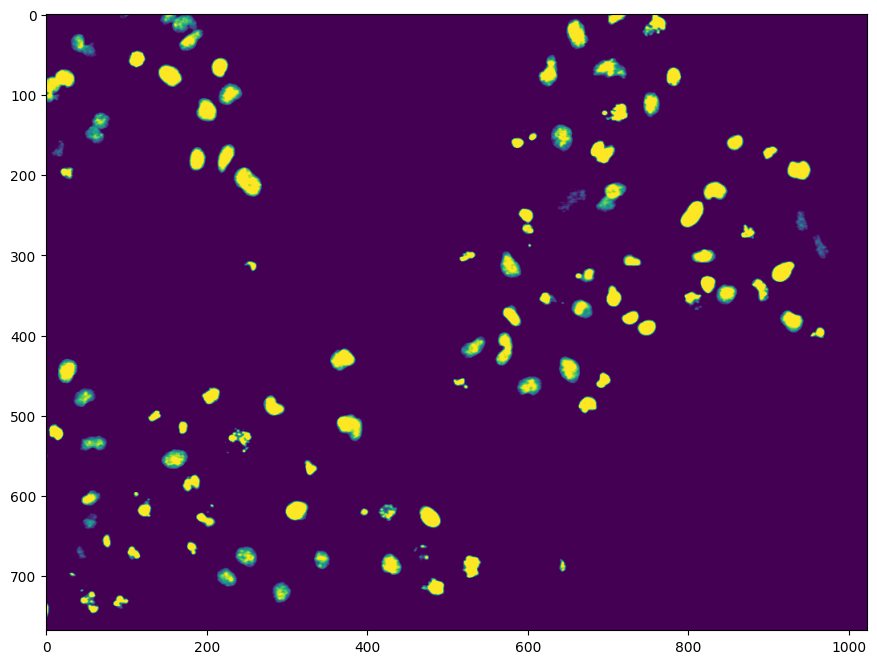

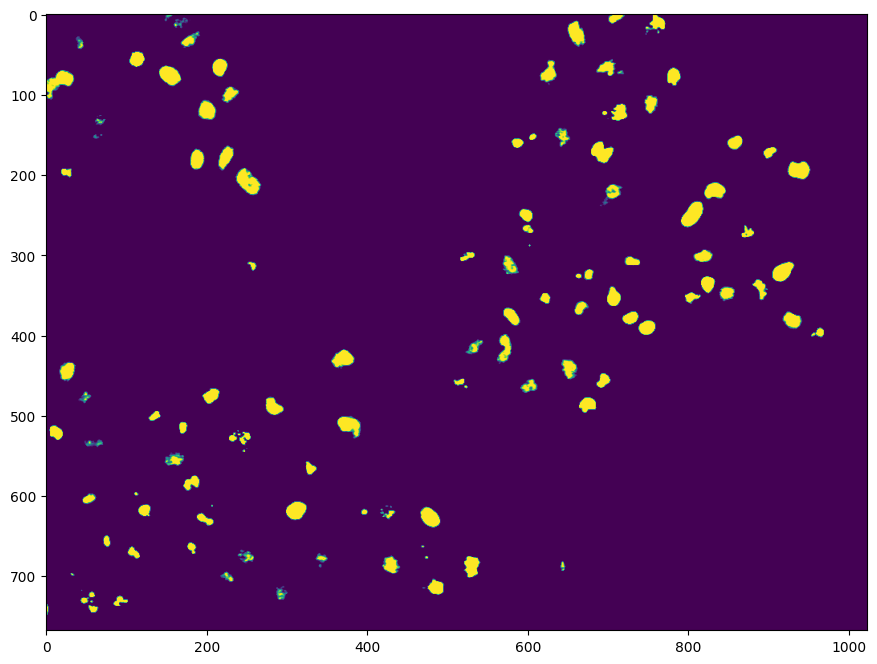

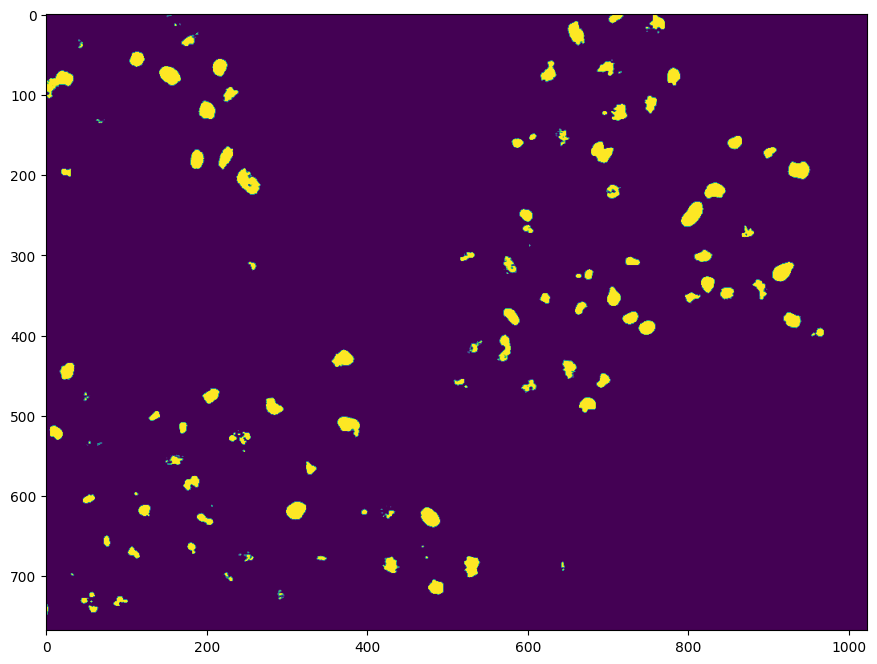

In [55]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.01, 0.99))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.5, 0.6))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.55, 0.58))
